In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-reviews-unlocked-mobile-phones/Amazon_Unlocked_Mobile.csv


# **Loading the dataset**

In [3]:
df = pd.read_csv('/kaggle/input/amazon-reviews-unlocked-mobile-phones/Amazon_Unlocked_Mobile.csv')

> **Look at few instances**

In [4]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


> **Information about the attributes**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


**Dataset Details**

  This dataset has **Product Name ,Brand Name ,Price ,Rating, Reviews ,Review Votes**   as attributes

 Description of attributes: 

  1.  **Product Name** - name of the product, e.g. *Apple iPhone 5 16GB Factory Unlocked GSM Cell Phone - White'*
  2.  **Brand Name** - name of the brand, e.g. *Apple*
  3.  **Price** - Price of the product, e.g.  *224.7k*         
  4.  **Rating** - Rating given by the user, e.g. *5*          
  5.  **Reviews** - Review of the product given by the user, e.g. *amazing display and long lasting battery*       
  6.  **Review Votes** - no. of likes on the review, e.g. *3*  

# 1. Handling NaN/NA values

> **Checking for Null values if any**

In [6]:
print("Shape of the dataset: ", df.shape)
print(df.isnull().sum())

Shape of the dataset:  (413840, 6)
Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64


* We have only **62** NULL values in **Reviews** attribute.
* **0** NULL values in **Rating** attribute.
* **Brand Name(~65k)**, **Review Votes(~12k)** and **Price(~6k)** attribute have considerable number of NULL values. 



**Brand Name**, **Review Votes** and **Price** doesn't add any value to our objective of the project. We are thinking to impute them.

So, let's focus on **Review** text. I don't think dropping would be a problem as there are only **62 null** values.

In [7]:
df.dropna(subset=['Reviews'], inplace = True)

**After dropping NULL values Reviews attr.:**
* **Now, imputing NULL Brand Name values with "Missing"**
* **NULL Price and Review Votes values with 0**

In [8]:
df["Brand Name"].fillna(value = "Missing", inplace = True)
df["Price"].fillna(value = 0, inplace = True)
df["Review Votes"].fillna(value = 0, inplace = True)

> **Lets do a final check for NULL values**

In [9]:
df.isnull().any()

Product Name    False
Brand Name      False
Price           False
Rating          False
Reviews         False
Review Votes    False
dtype: bool

* **We are done with handling all the NULL values.**
* **Let's move ahead for more exploration.**

# **2. Data Exploration**

> 2.1 Plotting countplot to see the categories count visually.

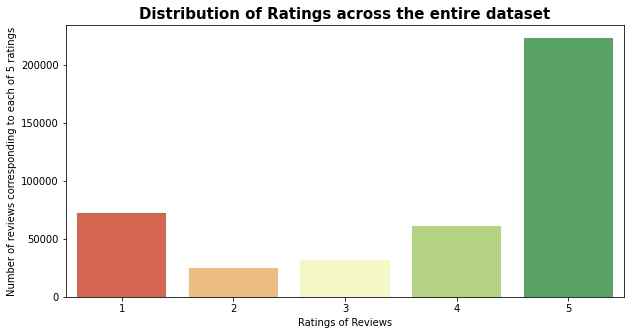

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df['Rating'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

> 2.2 We can also use pie chart to see percentage of the categories.

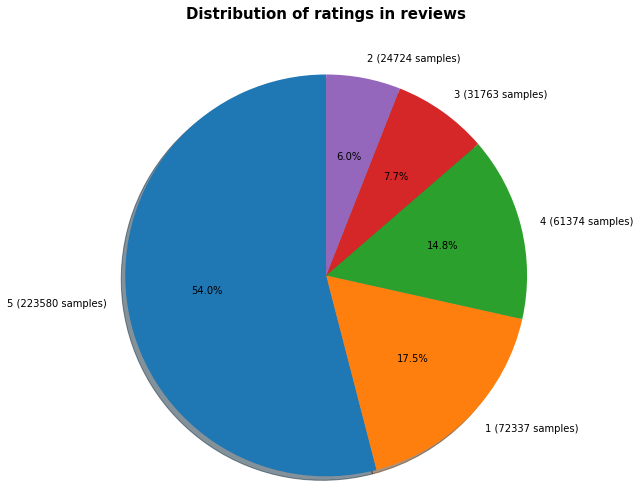

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Rating"].value_counts()[k]} samples)' for k in df['Rating'].value_counts().keys()]
sizes = dict(df['Rating'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of ratings in reviews",pad=40, fontweight='bold', fontsize=15)
plt.show();

> Dropping the columns which are irrelevant for now


**Observation:**

1. ~**68 percent** of the reviews in the dataset are **positive reviews** having ratings >3 (4 and 5)
2. ~**23 percent** of the reviews in the dataset are **negative reviews** having ratings <3 (1 and 2)
3. Remaining ~**8 percent** reviews have a rating of 3.

Since a major portion of the reviews are positive, we can say that most of the users have a good experience with their purchases.


In [12]:
df.drop(['Product Name', 'Brand Name', 'Price', 'Review Votes'], axis = 1, inplace = True)
df.head(5)

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...


# **3. Splitting into training and testing data.**

> We could have done this much earlier but it's OK to do it here. We can apply preprocessing on the unseen review text separately. We have already done with that here.
> **(Train ,Test) ratio is (70%,30%)**

<AxesSubplot:xlabel='Rating', ylabel='count'>

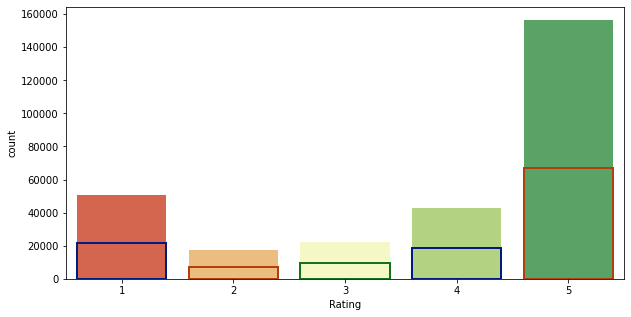

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Rating'], test_size=0.30, random_state=1, stratify=df['Rating'])
plt.figure(figsize=(10,5))
sns.countplot(y_train, palette=sns.color_palette("RdYlGn", 5), alpha = 1)
sns.countplot(y_test,facecolor=(0, 0, 0, 0), linewidth=2, edgecolor=sns.color_palette("dark", 3))

> **It is clearly visible how high the class imbalance is ! We will look at it later**

In [14]:
#Concatenating the training instances (reviews and target Variable)
X_train_df = pd.concat([X_train, y_train], axis = 1)
X_train_df = X_train_df.reset_index(drop=True)

In [15]:
X_train_df.head()

,Reviews,Rating
0,The Classic is absolutly Not the same old Bold...,1
1,- NICE AND PRACTICAL- Basic but not cheap .- v...,4
2,The watch arrived on time and as promised so I...,2
3,I have been using the phone last one week and ...,5
4,This phone grabbed all the functions of the Sa...,5


In [16]:
# to show how our functions are performing

diction = {'Reviews':["it's nice, it could've been beter",
                   "lloved it!!!! visit www.amazon.com/smartphones", 
                   "didn't like, junkkyyy, woorst piroduct",
                   "this is just awesoommee, worth the money",
                   "I'd recommend, but its a bit heavy",
                   "could have been much better, worst display though"
                  ]
        }
post_this_step = pd.DataFrame(diction)

#  **4. Preprocessing text data**

In any machine learning task, cleaning or preprocessing the data is as important as model building if not more. And when it comes to unstructured data like text, this process is even more important.



> We will be using the **"Natural Language Toolkit (NLTK) package"**, an open-source Python library for natural language processing and **"re"** library to perform regular expression operations

In [17]:
import nltk
import re

**4.1 Expanding contractions**

> Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. 

e.g. as can't -> can not
 
**Text**: *I'm pleased.I'd suggest you to buy this smartphone.* <br>
**ExpandedText**: *I am pleased.I would suggest you to buy this smartphone*

In [18]:
contraction_mapping = {"It's":"it is","it's":"it is", "its": "it is","ain't": "not", "aren't": "are not","can't": "can not", 'cannot':'can not',"'cause": "because",
        "could've": "could have", "couldn't": "could not", "didn't": "did not",
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
        "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
        "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
        "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
        "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is",
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
        "mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
        "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
        "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", 
        "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
        "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
        "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
        "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
        "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": 
        "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
        "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
        "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
        "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
        "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
        "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
        "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
        "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
        "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
        "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", 
        "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
        "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
        "you're": "you are", "you've": "you have" }

In [19]:
def expandContractions(text):
        updatedtext = ""
        for word in text.split():
            if word in contraction_mapping:
                updatedtext += contraction_mapping[word] + " "
            else:
                updatedtext += word + " "
                
        return updatedtext[:-1]

X_train_df['Reviews'] = X_train_df['Reviews'].apply(expandContractions)

In [20]:
# after expanding contractions

post_this_step['Expanded Reviews'] = post_this_step['Reviews'].apply(expandContractions)
post_this_step.head()

,Reviews,Expanded Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter"
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct"
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money"
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy"


**4.2 Tokenization**

> Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

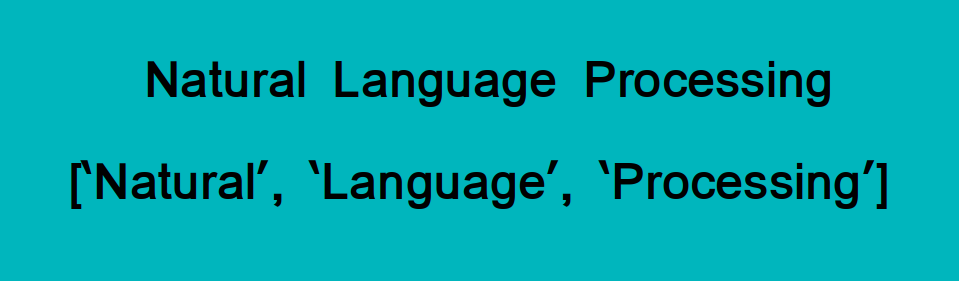

> There are numerous uses of doing this. We can use this tokenized form to:

* Count the number of words in the text, 
* Count the frequency of the word, that is, the number of times a particular word is present


In [21]:
from nltk.tokenize import RegexpTokenizer

# based on the study of this dataset, we can ignore :), ;( 
def tokenization(text):
        text = re.sub(r'www','https',text)
        text = re.sub(r'http[^\s]+','',text)
        text = re.sub('@[^\s]+','',text)
        tokenizer = RegexpTokenizer("[a-zA-Z]+", discard_empty=True)
        text = tokenizer.tokenize(text)
        text = " ".join(text)
        return text.lower()
    
# applying tokenization along with punctuation removal and lowercasing
X_train_df['Reviews'] = X_train_df['Reviews'].apply(tokenization)

In [22]:
#after applying tokenization 
post_this_step['Tokenized Reviews'] = post_this_step['Expanded Reviews'].apply(tokenization)
post_this_step.head()

,Reviews,Expanded Reviews,Tokenized Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter",it is nice it could have been beter
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones,lloved it visit
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct",did not like junkkyyy woorst piroduct
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money",this is just awesoommee worth the money
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy",i would recommend but it is a bit heavy


**With tokenization we have removed below mentioned punctuation symbols**

> We contains the following punctuation symbols

> !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

> We need to retain emotion conveying punctuation marks such as :), :)), :(

> We can add or remove more punctuations as per our need.

**4.3 Stopwords Removal**

* Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.
These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

> NLTK's stopwords list consists of some useful words as well. So we have prepared a list manually adding alphabets(like S,G,T etc because they denote the Product Model as in Samsung Galaxy S, i phone X12, Moto E2 etc).

In [23]:
stop_words= ['yourself','yourselves','herself', 'themselves', 'himself', 'ourselves',
            'myself', 'between', 'whom', 'is', "she", 'here', 'your', 'each', 'we', 'he',
            'my', 'you', 'are', 'them', 'other','and', 'an', 'their', 'can', 'she', 'these',
            'ours', 'while', 'have', 'when', 'were', 'who', 'they', 'has', 'before', 'yours',
             "it", 'on',  'now', 'her', 'an', 'from', "would",'how', 'the', 'or', 'doing',
            'his',  'was', 'through', 'own', 'theirs', 'me', 'him', 'be', 'same', 'it', 'its', 
            'which', 'there','our', 'this', 'hers', 'being', 'did','those', 'i', 'does', 'will',
            'shall', 's','t','n','d', 'e','u', 'x','am','get','ve']

In [26]:
# function to filter out stopwords
def removeStopwords(text):
        updatedtext = ""
        for word in text.split():
            if(word not in stop_words):
                updatedtext += word + " "

        return updatedtext[:-1]

# removing stopwords from the Reviews attribute
X_train_df['Reviews'] = X_train_df['Reviews'].apply(removeStopwords)

> **After removing stopwords,**

In [27]:
post_this_step['Stopwords Removed Reviews'] = post_this_step['Tokenized Reviews'].apply(removeStopwords)
post_this_step

,Reviews,Expanded Reviews,Tokenized Reviews,Stopwords Removed Reviews
0,"it's nice, it could've been beter","it is nice, it could have been beter",it is nice it could have been beter,nice could been beter
1,lloved it!!!! visit www.amazon.com/smartphones,lloved it!!!! visit www.amazon.com/smartphones,lloved it visit,lloved visit
2,"didn't like, junkkyyy, woorst piroduct","did not like, junkkyyy, woorst piroduct",did not like junkkyyy woorst piroduct,not like junkkyyy woorst piroduct
3,"this is just awesoommee, worth the money","this is just awesoommee, worth the money",this is just awesoommee worth the money,just awesoommee worth money
4,"I'd recommend, but its a bit heavy","I would recommend, but it is a bit heavy",i would recommend but it is a bit heavy,recommend but a bit heavy
5,"could have been much better, worst display though","could have been much better, worst display though",could have been much better worst display though,could been much better worst display though


> **Some of the reviews were not useful that they only contain stopwords and now they might have become NULL, so its good to check if we can remove them**

In [28]:
print(X_train_df.isnull().sum())

Reviews    0
Rating     0
dtype: int64


> **Good to go!,  none of the reviews become NULL after stopwords removal**

In [29]:
X_train_df.head(40)

,Reviews,Rating
0,classic absolutly not old bold that gave up to...,1
1,nice practical basic but not cheap very resist...,4
2,watch arrived time as promised so extremely ha...,2
3,been using phone last one week loving camera w...,5
4,phone grabbed all functions of samsung note th...,5
5,first time ever write a review about a product...,5
6,had phone for days love bought neon orange pho...,5
7,a person of trash sent only empty box without ...,1
8,wanted phone to good promising but kept turnin...,1
9,cellphone very fast compared to verizon galaxy...,5


> **As can be seen there are a lot of spelling mistakes that would lead to redundant features and degrade the performance. So its good to try to correct them.**

**4.4 Spelling correction with Repeated characters replacement**


> **I have observed that the number of features <a href="https://www.kaggle.com/rajatagg/starratingprediction-part-2/notebook">Part-2</a> and <a href="https://www.kaggle.com/rajatagg/starratingprediction-part-3">Part-3</a> have increased significantly due to spelling errors and causing redundant features may be resulting in degraded performance of the model.**

In [30]:
# installing the package and importing the required libraries
!pip install -U symspellpy
import pkg_resources
from symspellpy import SymSpell, Verbosity # efficient spelling correction

# using the dictionary of enlish words
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
) 

  Using cached symspellpy-6.7.6-py3-none-any.whl (2.6 MB)
  Using cached editdistpy-0.1.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (125 kB)


In [36]:
from nltk.corpus import wordnet # to replace repeated words

In [31]:
class RepeatReplacer(object):
    
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        if wordnet.synsets(word):
            return word
            
        repl_word = self.repeat_regexp.sub(self.repl, word)
    
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

In [37]:
# instantiating the sym spell object 
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# loading the dictionary to match to the correct words
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# instantiating the object for repeated character replacement
replacer = RepeatReplacer()

In [38]:
# function to correct misspelled words
def spellingCorrectionSymSpell(text):
        ans = ""
        for word in text.split():
            # checking for the spelling correction, returns empty ,if it didnt find a word
            # because include_unknown parameter (when false)
            # reason might be the words having repeated characters like gooooooood, excelllleeeeeeent etc
            # which go beyond the edit_distance of 2
            suggestions = sym_spell.lookup(word, Verbosity.TOP, max_edit_distance=2, include_unknown=False)

            if(len(suggestions) == 0):
                text = replacer.replace(word)
                # if still after correction the word is not found, we will skip that word(include_unk = True)
                suggestions = sym_spell.lookup(text, Verbosity.TOP, max_edit_distance=2, include_unknown=True)

            if(len(suggestions) > 0):
                text = str(suggestions[0])
                text = re.search(r'[a-zA-Z]+',str(text))
                ans += (text.group()) + " "
        return ans[:-1]


X_train_df['Reviews'] = X_train_df['Reviews'].apply(spellingCorrectionSymSpell)

In [41]:
post_this_step['Correctly Spelled Reviews'] = post_this_step['Stopwords Removed Reviews'].apply(spellingCorrectionSymSpell)
post_this_step

,Stopwords Removed Reviews,Correctly Spelled Reviews
0,nice could been beter,nice could been better
1,lloved visit,loved visit
2,not like junkkyyy woorst piroduct,not like junky worst product
3,just awesoommee worth money,just awesome worth money
4,recommend but a bit heavy,recommend but a bit heavy
5,could been much better worst display though,could been much better worst display though


In [40]:
post_this_step.drop(columns=['Reviews', 'Expanded Reviews', 'Tokenized Reviews'], inplace=True)

**4.5 Lemmatization**

*  Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. 
* Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 
* Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as the same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

<pre>
Examples of lemmatization:
-> corpora : corpus
-> better : good
</pre>

In [43]:
# importing the required libraries 
import spacy  
sp = load('en_core_web_sm') # english language model

In [44]:
#(SpaCy lemmatizer is much more accurate but takes longer than nltk)
def lemmatizeTextSpacy(text):
    lemmatizedList = ""
    text = sp(text)
    for word in text:
        lem_word = word.lemma_
        lemmatizedList += lem_word + " "
    return lemmatizedList[:-1]

X_train_df['Reviews'] = X_train_df['Reviews'].apply(lemmatizeTextSpacy)

In [45]:
post_this_step['lemmatized Reviews'] = post_this_step['Correctly Spelled Reviews'].apply(lemmatizeTextSpacy)
post_this_step

,Stopwords Removed Reviews,Correctly Spelled Reviews,lemmatized Reviews
0,nice could been beter,nice could been better,nice could be well
1,lloved visit,loved visit,love visit
2,not like junkkyyy woorst piroduct,not like junky worst product,not like junky bad product
3,just awesoommee worth money,just awesome worth money,just awesome worth money
4,recommend but a bit heavy,recommend but a bit heavy,recommend but a bit heavy
5,could been much better worst display though,could been much better worst display though,could be much well bad display though


In [46]:
# encapsulate all the pre-processing functions together
def preprocessReviewPrintingSteps(review):
        print("The review entererd is: ", review,"\n")
        expanded_review = expandContractions(review)
        print("After expanding contractions: ",expanded_review,"\n")
        tokenized_review = tokenization(expanded_review)
        print("After tokenization: ", tokenized_review,"\n")
        removed_stopwords_review = removeStopwords(tokenized_review)
        print("After removing stop words: ", removed_stopwords_review,"\n")
        spellChecked_review = spellingCorrectionSymSpell(removed_stopwords_review)
        print("After possible repeated letters replacement & spelling correction: ", spellChecked_review,"\n")
        lemmatized_review = lemmatizeTextSpacy(spellChecked_review)
        print("After applying lemmatization: ", lemmatized_review,"\n")
        return lemmatized_review

In [47]:
print(preprocessReviewPrintingSteps("https://www.amazon.com greattttt ......loved it :) I'd hihgly recommedn"))

The review entererd is:  https://www.amazon.com greattttt ......loved it :) I'd hihgly recommedn 

After expanding contractions:  https://www.amazon.com greattttt ......loved it :) I would hihgly recommedn 

After tokenization:  greattttt loved it i would hihgly recommedn 

After removing stop words:  greattttt loved hihgly recommedn 

After possible repeated letters replacement & spelling correction:  great loved highly recommend 

After applying lemmatization:  great loved highly recommend 

great loved highly recommend


# All the major preprocessing steps are done. Let's do some more visualization adding more features !

> **Adding review length i.e no. of characters in a review and no.of words in a review attribute to explore more**

In [48]:
# function to count characters in a list of strings
def getWordCount(text):
    word_count = 0
    for word in text.split():
        word_count += 1
    return word_count

def getReviewLength(text):
    review_length = 0
    for word in text.split():
        review_length += len(word)
    return review_length

In [49]:
X_train_df['review_length'] = np.array(X_train_df['Reviews'].apply(getReviewLength))
X_train_df['word_count'] = np.array(X_train_df['Reviews'].apply(getWordCount))

In [50]:
X_train_df.head(5)

,Reviews,Rating,review_length,word_count
0,classic absolutely not old bold that give up t...,1,761,177
1,nice practical basic but not cheap very resist...,4,68,14
2,watch arrive time as promise so extremely happ...,2,467,108
3,be use phone last one week love camera work su...,5,1321,292
4,phone grab all function of samsung note then t...,5,177,41


In [53]:
X_train_df.to_csv('trainData.csv', index = False)

**5.1 Review Text Length Distribution**

> Let's check out the length of review text

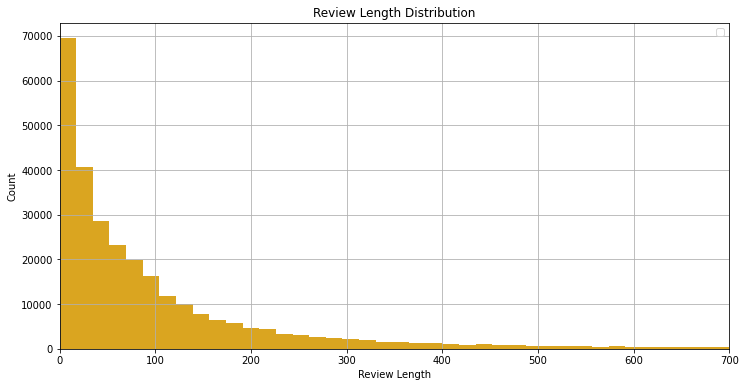

In [54]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 1000
plt.hist(X_train_df['review_length'], facecolor='goldenrod', alpha=1, bins=bins)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(0,700)
plt.grid(True)
plt.show()

> **Most of the review lengths falls in between 0-200. It would be better to consider reviews having reviews.length <= 200 as it will help us to get less sparse feature vectors and save us a lot of memory space.**

In [55]:
print(len(X_train_df[X_train_df['review_length'] > 200])*100/len(X_train_df))

16.05729792434851


>**~16 percent** of the reviews have review.length > 200. 

In [56]:
# we are not deleting them now.
# Updating dataframe
# index_names = X_train_df[X_train_df['review_length'] > 200].index

In [57]:
# X_train_df.drop(index_names, inplace = True)

**5.2 Word Count Distribution**

> Let's check out the word count distribution

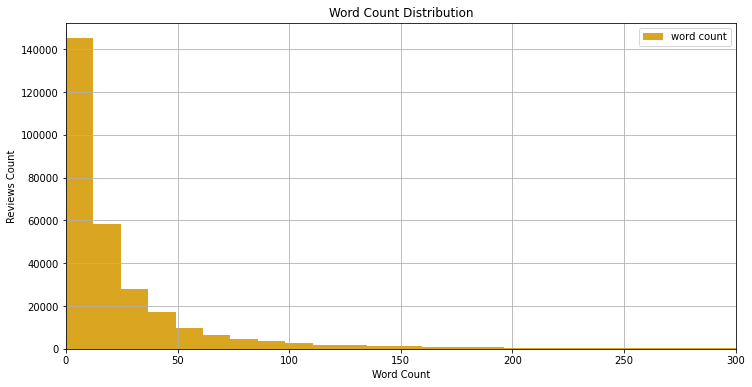

In [62]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.title('Word Count Distribution')
plt.hist(X_train_df['word_count'], bins=300,facecolor='goldenrod', label=['word count'])
plt.xlim(0,300)
plt.xlabel('Word Count')
plt.ylabel('Reviews Count')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

> **Most of the reviews have less than 100 words per review :)**

**Let's remove the rows where word count is 0 since stop words removal can lead us to that as well**

In [63]:
print(X_train_df[X_train_df['word_count'] == 0].count())
X_train_df.drop(X_train_df[X_train_df['word_count'] == 0].index , inplace = True)

Reviews          458
Rating           458
review_length    458
word_count       458
dtype: int64


**5.3 Segregating positive and negative reviews**

In [64]:
dfNegReviews = X_train_df[X_train_df["Rating"] < 3]
dfPosReviews = X_train_df[X_train_df["Rating"] > 3]

> **Now let’s see which are the words used mostly in positive reviews and the most used words in negative reviews.**

In [65]:
# importing the library
from wordcloud import WordCloud


> **5.3.1 WordCloud of negative reviews**

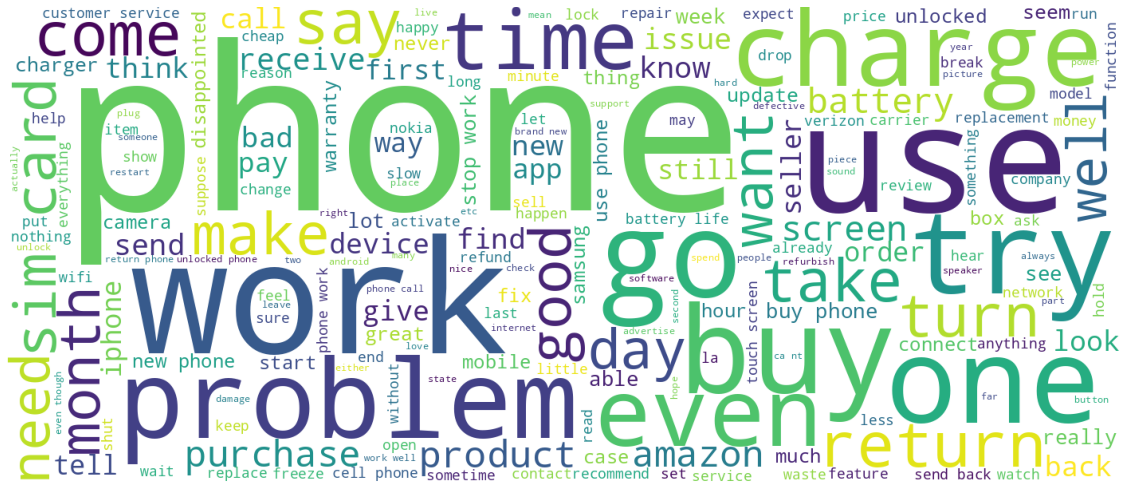

In [66]:
text = ""
for review in dfNegReviews['Reviews']:
    text += review
        
wordcloud = WordCloud(background_color="white",width=1400, height=600).generate(text)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

> **5.3.2 WordCloud of positive reviews**

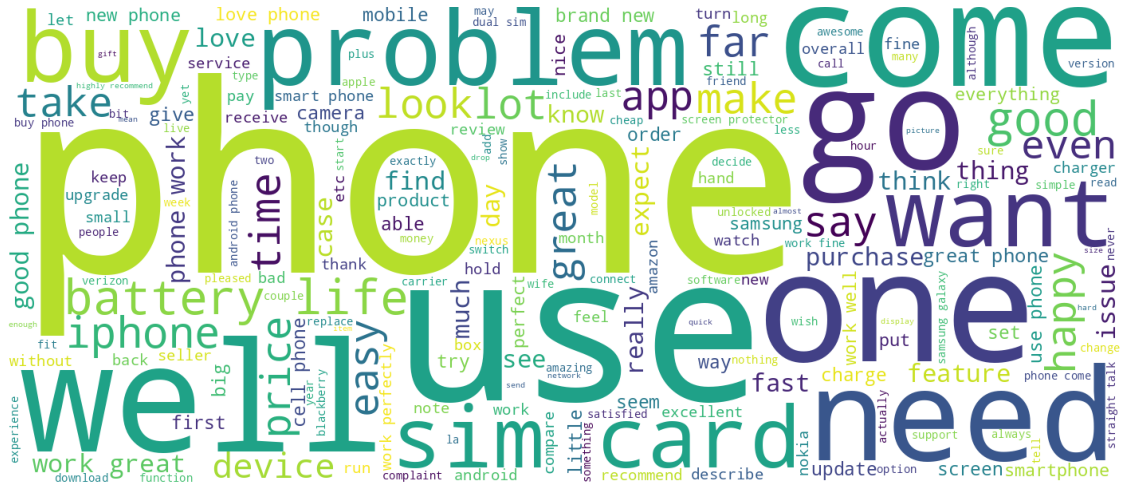

In [67]:
text = ""
for review in dfPosReviews['Reviews']:
        text += review
        
wordcloud = WordCloud(background_color="white",width=1400, height=600).generate(text)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

**5.4 Let's do bi-gram and tri-gram analysis as well**

In [68]:
# importing the libaries 
from nltk.util import ngrams
from collections import Counter

In [69]:
# function to generate N-grams based on the size(= 1(unigram), 2(bigram), 3(trigram))

def generateNgrams(documents, size):
    '''
    Input: 
    documents: dataframe having only reviews stacked
    size: size of ngram(as 1,2,3..)
    
    Output:
    dataframe:{columns = {'words','count'}}
    '''
    
    
    ngrams_all = []
    
    for document in documents:  # the document is not splitted already
         
        document = document.split()
        
        if len(document) < size:
            continue
        else:
            output = list(ngrams(document, size)) # using NLTK's ngrams function
            
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
            
    count_ngram = Counter()
    
    for word in ngrams_all:  # making word frequency dictionary
        count_ngram[word] += 1
        
    
    # converting from dictionary to dataframe data structure
    
    df = pd.DataFrame.from_dict(count_ngram, orient='index').reset_index()
    
    df = df.rename(columns={'index':'words', 0:'count'})
    
    df = df.sort_values(by='count', ascending=False) # highest freq words on the top
    
    df = df.head(25) # taking 20 most frequent n-grams
    
    df = df.sort_values(by='count')
    
    
    return df

In [70]:
# function to plot the word frequency distribution

def plotNgrams(documents):
    
    '''
    documents : dataframe attribute having reviews text or lists of reviews
    '''
    
    unigrams = generateNgrams(documents, 1)
    bigrams = generateNgrams(documents, 2)
    trigrams = generateNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)
    
    # plot 1
    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=1)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')
    
    # plot 2
    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=1, color = 'red')
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')
    
    # plot 3
    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=1, color = 'green')
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

> **5.4.1 Let's look at positive n-grams**

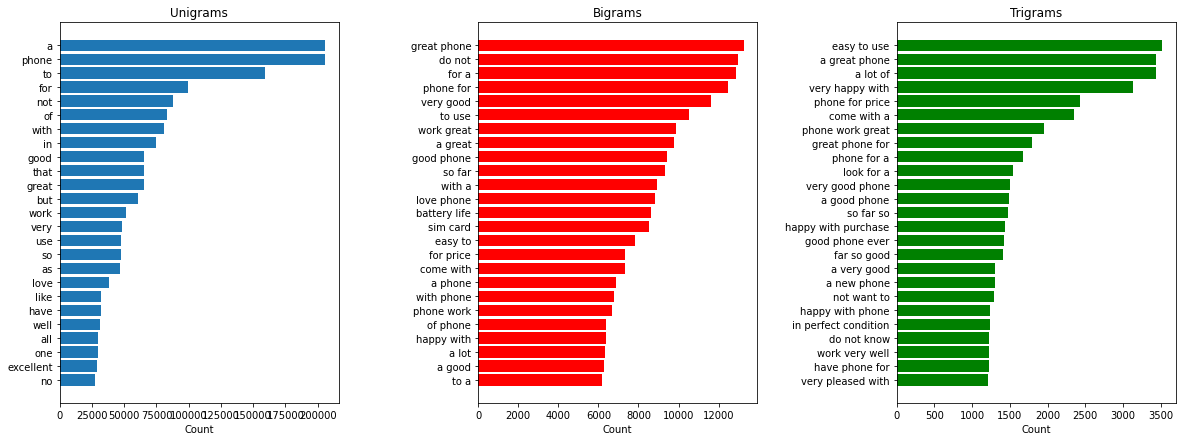

In [71]:
plotNgrams(dfPosReviews['Reviews'])

> **5.4.2 Let's look at negative n-grams**

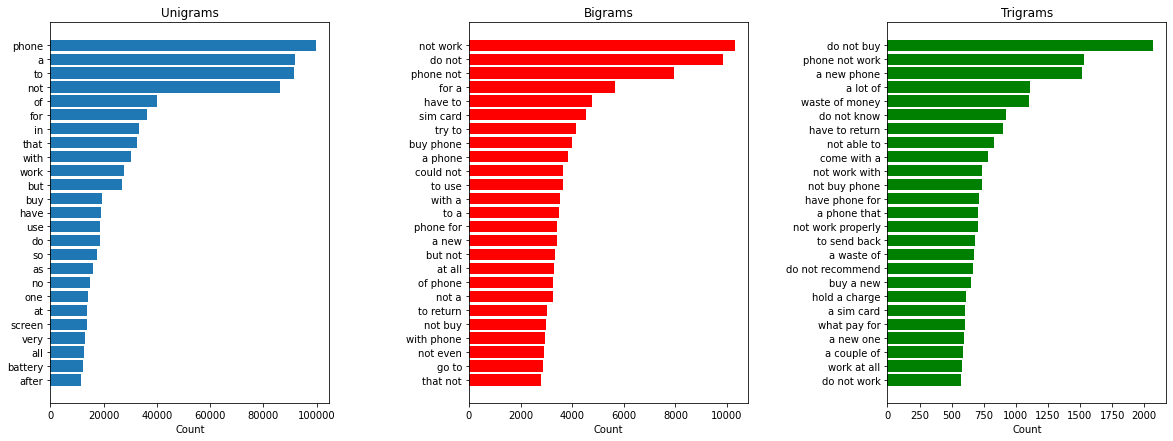

In [72]:
plotNgrams(dfNegReviews['Reviews'])

**We are done with text-preprocessing and visualization. Let's move towards feature vector generation :)**

# **6. Feature vector generation**

> **6.1 Bag of Words Model**

This is perhaps the most simple vector space representational model for unstructured text. A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature/attribute. The Bag of Words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0), or even weighted values. **The model’s name is such because each document is represented literally as a bag of its own words, disregarding word order, sequences, and grammar.**

e.g,
> **Review1: It is really of no value for money.(Negative sentiment)**

> **Review2: No! it is really of value for money.(Positive sentiment)**

**BoW model will treat them negative as it does not take an account of the order of words.**

> **6.2 TF-IDF Model**

There are some potential problems that might arise with the Bag of Words model when it is used on large corpora. Since the feature vectors are based on absolute term frequencies, there might be some terms that occur frequently across all documents and these may tend to overshadow other terms in the feature set. Especially words that don’t occur as frequently, but might be more interesting and effective as features to identify specific categories. This is where TF-IDF comes into the picture. TF-IDF stands for **term frequency-inverse document frequency**. It’s a combination of two metrics, term frequency (tf ) and inverse document frequency (idf ). This technique was originally developed as a metric for ranking search engine results based on user queries and has come to be a part of information retrieval and text feature extraction.


* The **term frequency(tf)** of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document(or review), or by the raw frequency of the most frequent word in a document.

* The **inverse document frequency(idf)** of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.



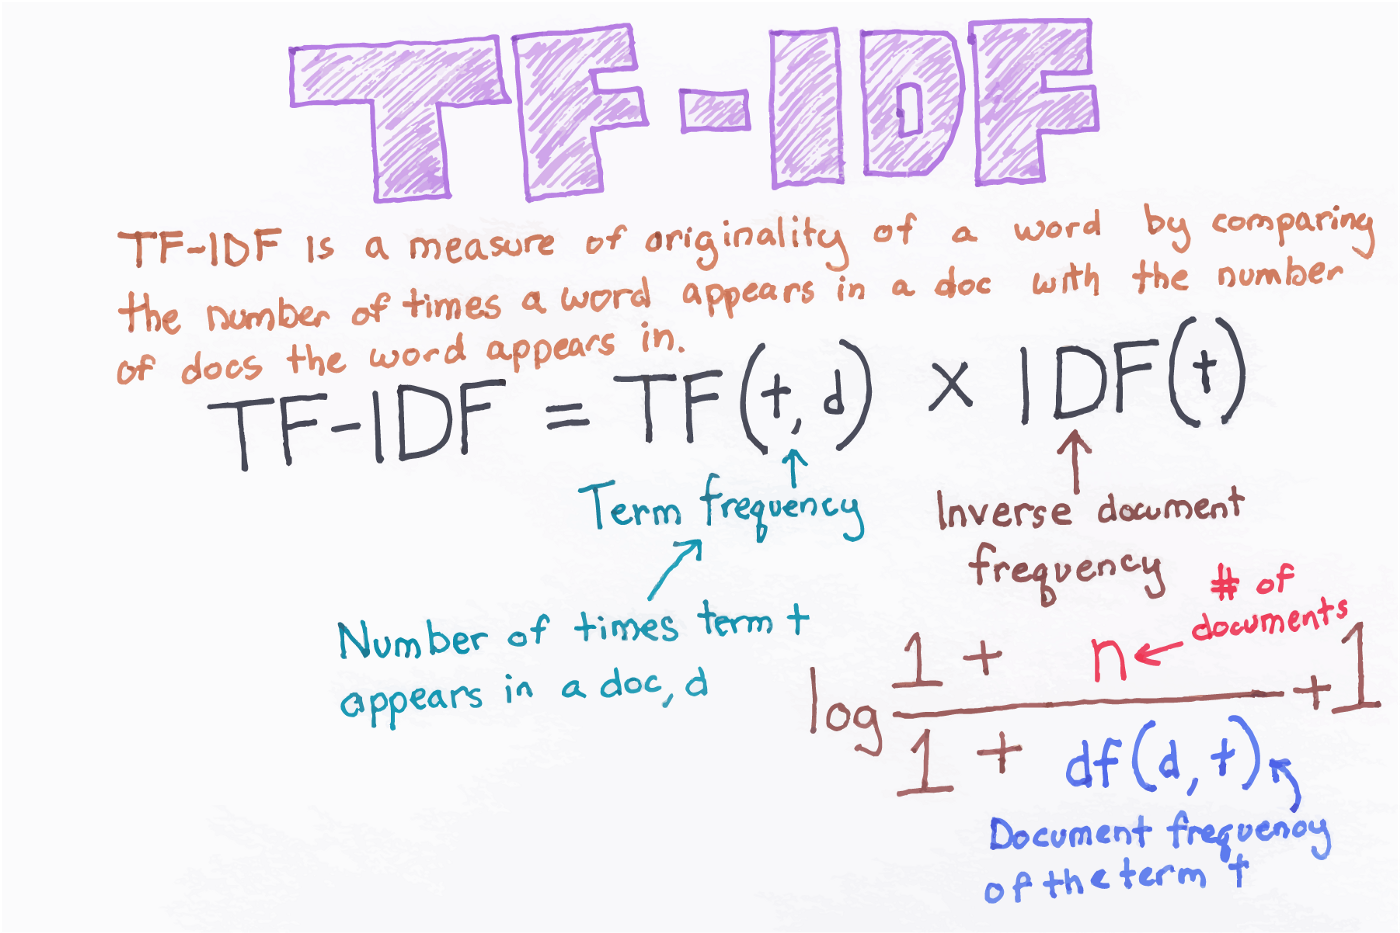
[Image Source](https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558)

# Feature Vector Generation for Bi-grams, Tri-grams will be done in another notebook :)

**References to Kaggle Notebooks**

* [Data Exploration](https://www.kaggle.com/benroshan/sentiment-analysis-amazon-reviews)

* [Regular Expression](https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-regular-expressions-in-natural-language-processing/)

* [Text Preprocessing](https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing)

* [Feature Vector Generation](https://www.kaggle.com/paulrohan2020/tf-idf-tutorial/notebook)